# IN_SYS - SW12 Exercise 2/3

## YOLO fine-tuned recognition for racoons¶

In [1]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os
import numpy as np
from pathlib import Path
import requests

In [2]:
# Get the current folder
current_folder = Path().resolve()

# Combine the folder path with the yolo file name
file_name = 'yolo_racoon_finetuned.pt'
file_path = current_folder / file_name

print(f"The full path to the file is: {file_path}")
# Load the YOLOv11 model
model = YOLO(file_path)

The full path to the file is: /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/yolo_racoon_finetuned.pt



image 1/1 /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/raccoon_samples/raccoon_1.jpg: 416x640 1 raccoon, 115.1ms
Speed: 4.8ms preprocess, 115.1ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)


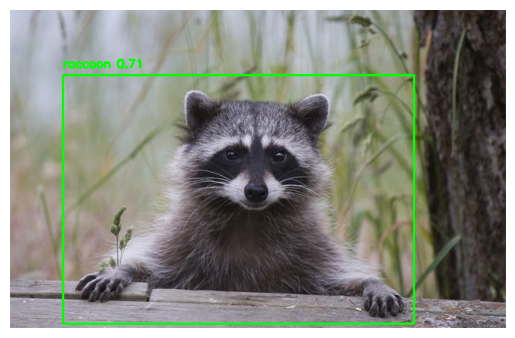


image 1/1 /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/raccoon_samples/raccoon_2.jpg: 480x640 1 raccoon, 107.8ms
Speed: 1.5ms preprocess, 107.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


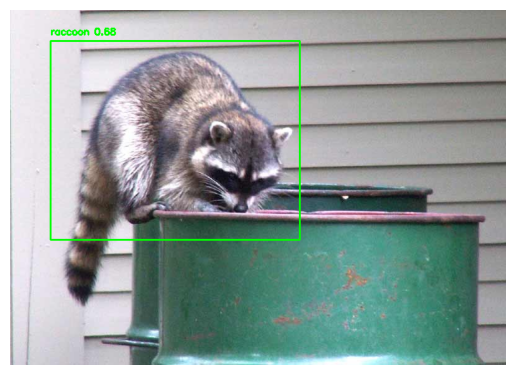


image 1/1 /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/raccoon_samples/raccoon_3.jpg: 448x640 1 raccoon, 82.5ms
Speed: 1.4ms preprocess, 82.5ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


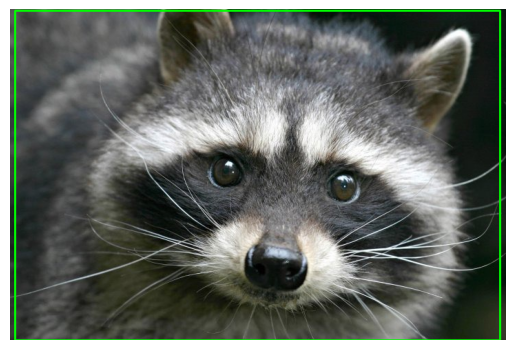


image 1/1 /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/raccoon_samples/raccoon_7.jpg: 512x640 1 raccoon, 96.0ms
Speed: 1.8ms preprocess, 96.0ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 640)


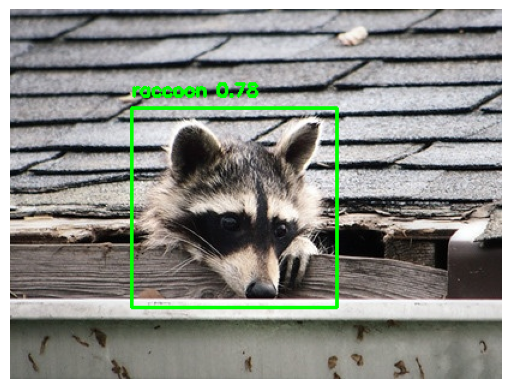


image 1/1 /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/raccoon_samples/raccoon_6.jpg: 480x640 1 raccoon, 90.7ms
Speed: 1.6ms preprocess, 90.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


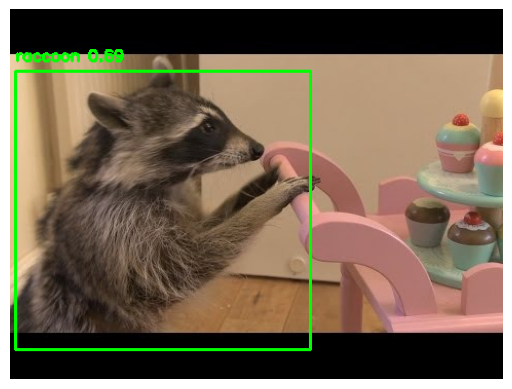


image 1/1 /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/raccoon_samples/raccoon_4.jpg: 448x640 1 raccoon, 85.8ms
Speed: 1.3ms preprocess, 85.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


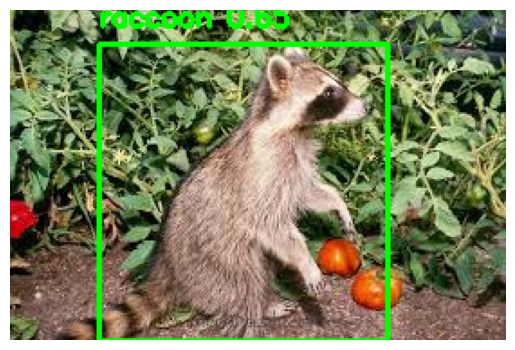


image 1/1 /Users/lzrvc/Documents/Artificial Intelligence/My Solutions and Projects/2025 10 - Intelligent Systems at HSLU/Course material 2025/SW 12/raccoon_samples/raccoon_5.jpg: 448x640 1 raccoon, 92.9ms
Speed: 1.8ms preprocess, 92.9ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


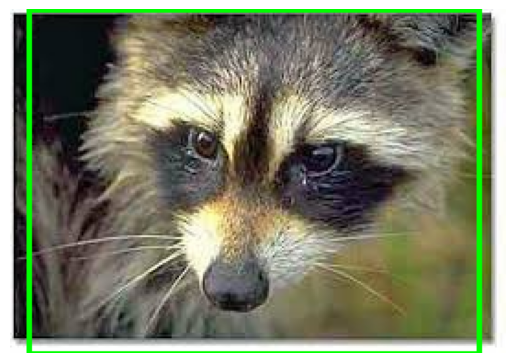

In [14]:
# Download and prepare sample raccoon images
sample_images = [
    "https://raw.githubusercontent.com/datitran/raccoon_dataset/master/images/raccoon-1.jpg",
    "https://raw.githubusercontent.com/datitran/raccoon_dataset/master/images/raccoon-2.jpg",
    "https://raw.githubusercontent.com/datitran/raccoon_dataset/master/images/raccoon-3.jpg",
    "https://raw.githubusercontent.com/datitran/raccoon_dataset/master/images/raccoon-4.jpg",
    "https://raw.githubusercontent.com/datitran/raccoon_dataset/master/images/raccoon-5.jpg",
    "https://raw.githubusercontent.com/datitran/raccoon_dataset/master/images/raccoon-6.jpg",
    "https://raw.githubusercontent.com/datitran/raccoon_dataset/master/images/raccoon-7.jpg",
]

# Save sample images locally
os.makedirs("raccoon_samples", exist_ok=True)
for idx, img_url in enumerate(sample_images):
    img_data = cv2.imdecode(
        np.frombuffer(requests.get(img_url).content, np.uint8), cv2.IMREAD_COLOR
    )
    img_path = f"raccoon_samples/raccoon_{idx+1}.jpg"
    cv2.imwrite(img_path, img_data)

# Function to display images with predictions
def display_image_with_predictions(img_path, predictions):
    img = cv2.imread(img_path)
    for box in predictions[0].boxes:  # Iterate over detected boxes
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        conf = float(box.conf[0])  # Confidence score
        cls = int(box.cls[0])  # Class index
        label = f"{model.names[cls]} {conf:.2f}"  # Class name and confidence

        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Draw label
        cv2.putText(
            img, label, (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2
        )

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Run inference on each sample image
for img_path in os.listdir("raccoon_samples"):
    img_full_path = os.path.join("raccoon_samples", img_path)
    results = model(img_full_path, conf=0.5, iou=0.65)  # Run YOLOv8 inference
    display_image_with_predictions(img_full_path, results)